In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.stats as st
import time

In [2]:
max_20_b=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8n9d/max_cen_b.csv')
max_20_m=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8n9d/max_cen_m.csv')
max_20_e=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8n9d/max_cen_e.csv')
#########################
_tvels = 'центральных';
bad_state = 20;
#########################
len(max_20_b)
states = 100;

In [3]:
max_20_b = max_20_b.query('kq > 1.1 | state == 0')
max_20_m = max_20_m.query('kq > 1.1 | state == 0')
max_20_e = max_20_e.query('kq > 1.1 | state == 0')
len(max_20_b)

58680

In [4]:
def PlotSeries(_name,legend_prefix,df1,_tvel_type):
    plt.figure(figsize=(12,10));
    #bind=np.arange(min(df1),max(df1),step=0.5);
    print(max(df1));
    plt.grid(True);
    plt.xlabel('Всплески энерговыделения, %', fontsize=20);
    plt.ylabel('Частота', fontsize=20);
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    percent=95
    quant = st.scoreatpercentile(df1,percent)
    #plt.hist(df1,bind,label='{}, {}(95%)={:.2f}'.format(legend_prefix,_name,quant),alpha=0.75, color='blue');    
    plt.hist(df1,label='{}, {}(95%)={:.2f}'.format(legend_prefix,_name,quant),alpha=0.75, color='blue');    
    plt.vlines(quant,0,15,color='red')
    plt.legend(fontsize=20);
    plt.title(('Максимальное отклонение в энерговыделении {} твэлов').format(_tvel_type),fontsize=20);
    plt.show();

In [5]:
def GetMaxFromState(arr):
    max_val_kk = [];
    max_val_kr = [];
    for i in range(1,states):
        if (i == bad_state):
            continue;
        _state = arr.query('state == @i');
        _max_kq = _state.sort_values('kq').tail(120);
        _max_ = _max_kq.sort_values('kr').tail(1);
       # print(_max_);
        _max_.index = {0};
        _kk = _max_.at[0,'dkk'];
        if (_kk < 3):
            print(_max_);
        max_val_kk.append(_kk)
        _kr = _max_.at[0,'dkr'];
        #if (_kr < 6):
        #    print(_max_)        
        max_val_kr.append(_kr)
    return max_val_kk, max_val_kr;

In [6]:
def CaclulateDev(arr):
    dkr = [];
    dkq = [];
    dkk = [];
    nominal = arr.query('state == 0');
    for i in range(0,states):
        if ((i % 10) == 0):
            print('state {}'.format(i));
        state_arr = arr.query('state == @i');
      #  print(state_arr.index)
        for j in state_arr.index:
            try:
                _tvs =  state_arr.at[j, 'tvs'];
                _kq =   state_arr.at[j, 'kq'];
                _kk =   state_arr.at[j, 'kk'];
                _kr =   state_arr.at[j, 'kr'];
                _tvel = state_arr.at[j, 'tvel'];
                mini_norm_df = nominal.query('tvs == @_tvs & tvel == @_tvel');
                ix = mini_norm_df.index.tolist();
                _kk_n = mini_norm_df.at[ix[0],'kk'];
                _kq_n = mini_norm_df.at[ix[0],'kq'];
                _kr_n = mini_norm_df.at[ix[0],'kr'];
                dkk.append((100*(_kk - _kk_n) / _kk_n));
                dkq.append((100*(_kq - _kq_n) / _kq_n));
                dkr.append((100*(_kr - _kr_n) / _kr_n));
            except IndexError:
                print('try go to ix[0], but empty at {}'.format(j))
                return;
    print('Extracted len: {}-{}-{}'.format(len(dkk),len(dkr),len(dkq)))
    return dkk,dkr,dkq;

In [7]:
t0 = time.time()
dkk, dkr, dkq = CaclulateDev(max_20_b)
max_20_b['dkq'] = dkq
max_20_b['dkk'] = dkk
max_20_b['dkr'] = dkr
t1 = time.time()
print(t1-t0);

state 0
state 10
state 20
state 30
state 40
state 50
state 60
state 70
state 80
state 90
Extracted len: 58680-58680-58680
115.9253945350647


In [8]:
t0 = time.time()
dkk, dkr, dkq = CaclulateDev(max_20_m)
max_20_m['dkq'] = dkq
max_20_m['dkk'] = dkk
max_20_m['dkr'] = dkr
t1 = time.time()
print(t1-t0);

state 0
state 10
state 20
state 30
state 40
state 50
state 60
state 70
state 80
state 90
Extracted len: 48330-48330-48330
94.10418510437012


In [9]:
t0 = time.time()
dkk, dkr, dkq = CaclulateDev(max_20_e)
max_20_e['dkq'] = dkq
max_20_e['dkk'] = dkk
max_20_e['dkr'] = dkr
t1 = time.time()
print(t1-t0);

state 0
state 10
state 20
state 30
state 40
state 50
state 60
state 70
state 80
state 90
Extracted len: 40380-40380-40380
78.99914979934692


In [10]:
t0 = time.time()
max_b_kk, max_b_kr = GetMaxFromState(max_20_b);
max_m_kk, max_m_kr = GetMaxFromState(max_20_m);
max_e_kk, max_e_kr = GetMaxFromState(max_20_e);
t1 = time.time()
print(t1-t0);
print('arrays length: ',len(max_b_kk),len(max_b_kr),len(max_m_kk),len(max_m_kr),len(max_e_kk),len(max_e_kr))

   tvs  tvel  time      kk  state     kq        kr       dkq       dkk  \
0  109   297     0  1.1609     12  1.236  1.434872  0.897959  2.816402   

        dkr  
0  3.739652  
   tvs  tvel  time      kk  state     kq        kr       dkq       dkk  \
0   67   277     0  1.1606     29  1.235  1.433341  1.146601  2.571807   

        dkr  
0  3.747897  
   tvs  tvel  time      kk  state     kq        kr       dkq       dkk  \
0   70   317     0  1.1557     40  1.236  1.428445  0.897959  2.492018   

        dkr  
0  3.412355  
   tvs  tvel  time      kk  state     kq        kr       dkq       dkk  \
0   67   277     0  1.1626     72  1.235  1.435811  1.146601  2.748564   

       dkr  
0  3.92668  
   tvs  tvel  time     kk  state     kq        kr     dkq       dkk       dkr
0   67   287     0  1.151     81  1.227  1.412277  0.4914  2.238408  2.740808
   tvs  tvel  time      kk  state     kq       kr       dkq       dkk      dkr
0   97   307     0  1.1504     83  1.251  1.43915  2.122449

14.06429899920291


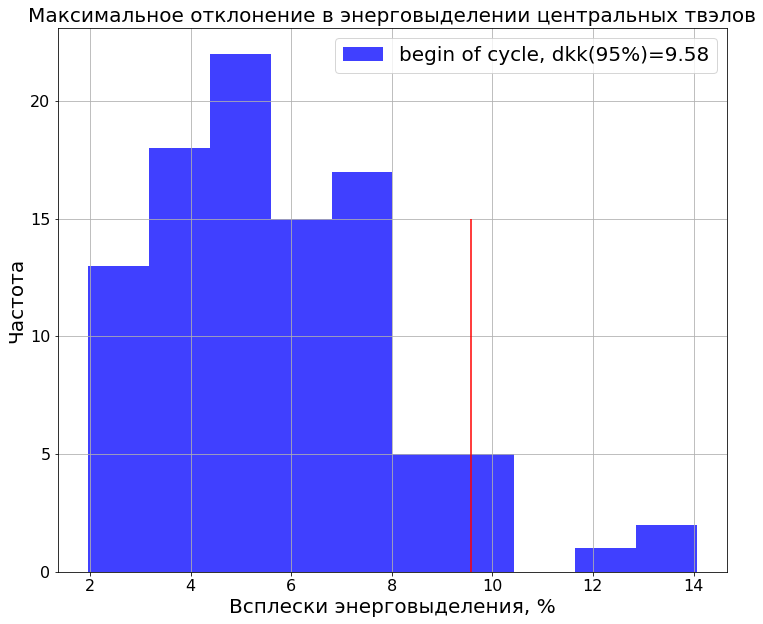

15.741415812570962


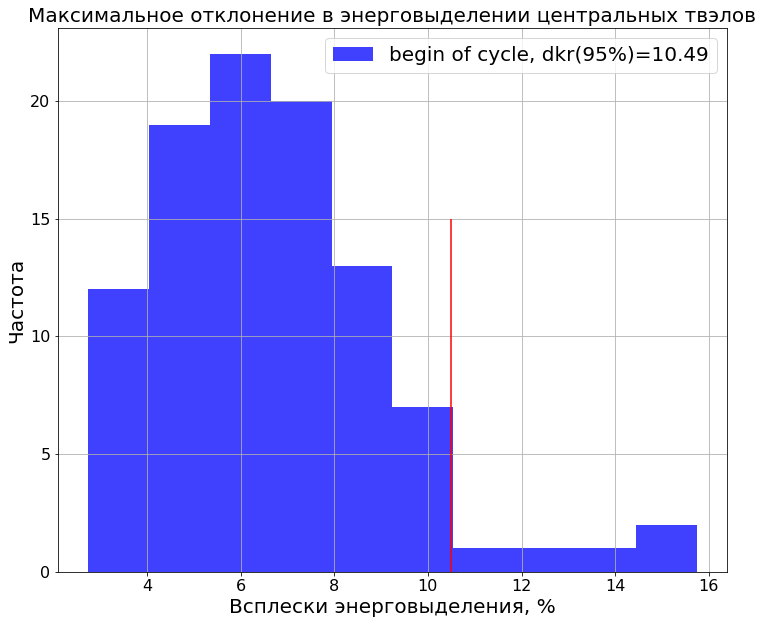

14.646946564885493


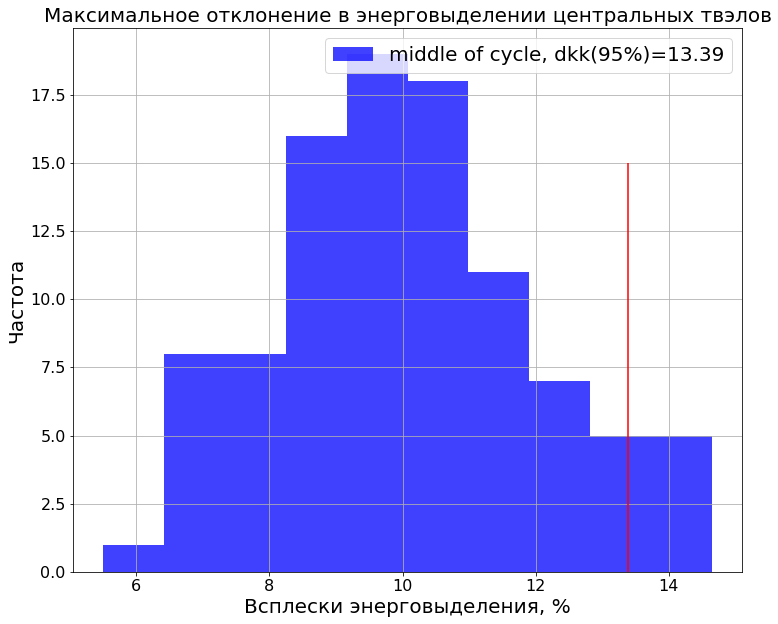

16.75396320751461


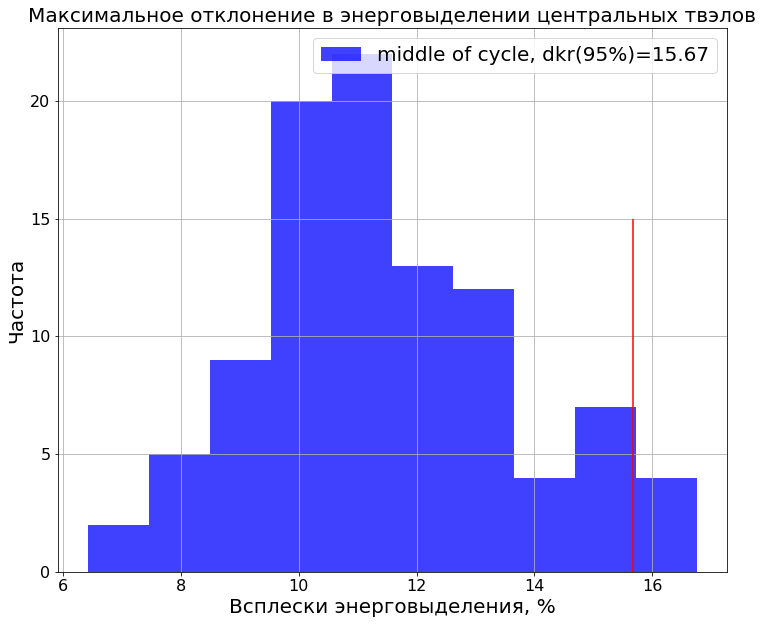

12.65219155844156


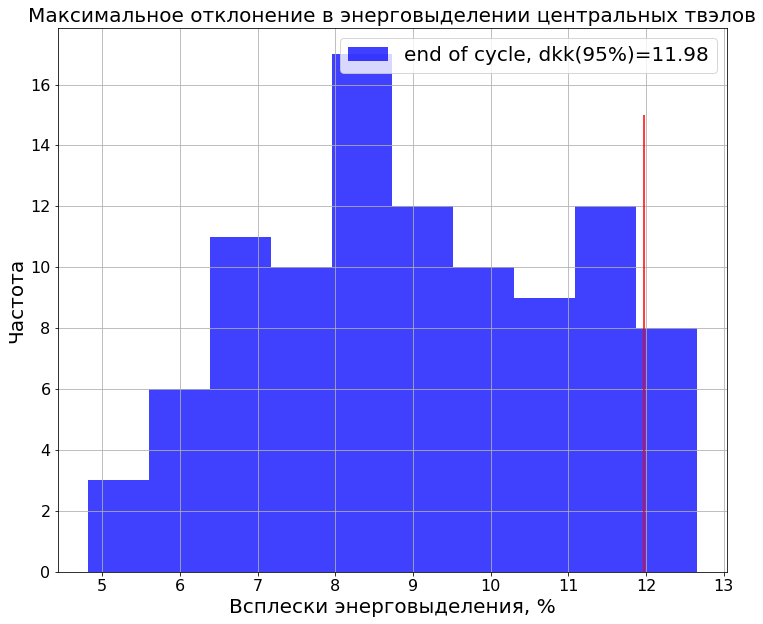

13.669802127670309


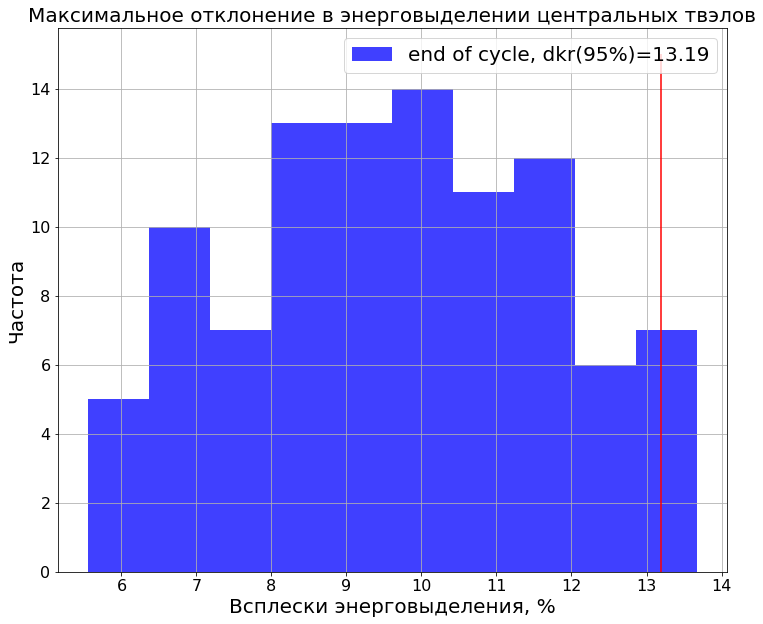

In [11]:
PlotSeries('dkk','begin of cycle', max_b_kk,_tvels)
PlotSeries('dkr','begin of cycle', max_b_kr,_tvels)
PlotSeries('dkk','middle of cycle', max_m_kk,_tvels)
PlotSeries('dkr','middle of cycle', max_m_kr,_tvels)
PlotSeries('dkk','end of cycle', max_e_kk,_tvels)
PlotSeries('dkr','end of cycle', max_e_kr,_tvels)

In [18]:
min(max_m_kr)

4.013377229103812

1.2163624000000002

tvs      105.000000
tvel     287.000000
time      13.000000
kk         0.936700
state     81.000000
kq         1.111000
kr         1.040674
dkq       -0.448029
dkk       -8.391198
dkr       -8.801632
Name: 79843, dtype: float64